In [197]:
import requests
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import json

In [199]:
with open('crossview_top_100.json') as j:
    json_parse = json.load(j)['data']['children']

In [200]:
info_needed = ('ups', 'downs', 'created', 'num_comments', 'gildings', 'is_video', 'num_crossposts')
posts_info = {col:[post['data'][col] for post in json_parse] for col in info_needed}

In [201]:
df = pd.DataFrame(posts_info)
df['score'] = df['ups'] - df['downs']

In [202]:
df['gilded'] = ~(df['gildings'] == {})

In [203]:
score_diff = df['score'].max() - df['score'].min()
created_diff = df['created'].max() - df['created'].min()
depth_correction = 30
df['score_3d'] = df['score'] + (depth_correction * ((df['created'] - df['created'].min()) / created_diff)) 

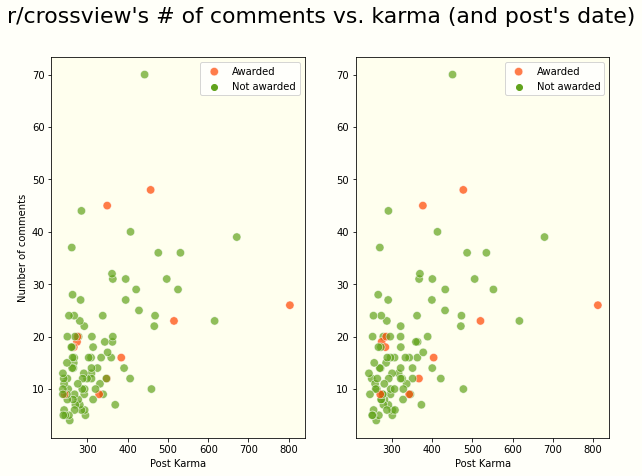

In [214]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 7), facecolor='#fffff9')
sns.scatterplot(
    x='score',
    y='num_comments',
    hue='gilded',
    data=df,
    hue_order=(False, True),
    palette=('#61a31b', '#ff4500'),
    s=70,
    alpha=0.7,
    ax=ax[0]
)

sns.scatterplot(
    x='score_3d',
    y='num_comments',
    hue='gilded',
    data=df,
    hue_order=(False, True),
    palette=('#61a31b', '#ff4500'),
    s=70,
    alpha=0.7,
    ax=ax[1],

)
ax[0].set_ylabel('Number of comments')
ax[1].set_ylabel('')

for a in range(2):
    ax[a].set_xlabel('Post Karma')
    ax[a].legend(['Awarded', 'Not awarded'])
    ax[a].set_facecolor("#ffffee")
plt.suptitle("r/crossview's # of comments vs. karma (and post's date)", fontsize=22)
fig.savefig('r_crossview karma vs comments.png', dpi=300, transparent=False)
plt.show()